# 1. Import Library

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_TESSELATION
from mediapipe.python.solutions.hands import HandLandmark
from mediapipe.python.solutions.hands_connections import HAND_CONNECTIONS
from mediapipe.python.solutions.pose import PoseLandmark
from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

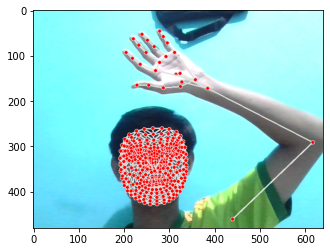

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
len(pose)

33

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)[:10]

In [18]:
result_test

array([ 0.41924539,  0.7378391 , -1.04128909,  0.99934864,  0.44524422,
        0.67034477, -0.95443046,  0.99912584,  0.46389222,  0.66948706])

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.41924539,  0.7378391 , -1.04128909,  0.99934864,  0.44524422,
        0.67034477, -0.95443046,  0.99912584,  0.46389222,  0.66948706])

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
# htlo
## 0
## 1
## 2
## 29
## thanks
## I love you

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6. Pre-processing Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(90, 30, 1662)

In [30]:
np.array(labels).shape

(90,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(90, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
y_test.shape

(18, 3)

# 7. Build and Train LSTM Neural Network

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [97]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [98]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [99]:
res = [0.9, 0.1, 1]

In [100]:
actions[np.argmax(res)]

'iloveyou'

In [103]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [104]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 6s 161ms/step - loss: 1812.6102 - categorical_accuracy: 0.3194
Epoch 2/1000
3/3 [==============================] - 1s 290ms/step - loss: 919.0673 - categorical_accuracy: 0.3056
Epoch 3/1000
3/3 [==============================] - 1s 172ms/step - loss: 281.2564 - categorical_accuracy: 0.3472
Epoch 4/1000
3/3 [==============================] - 1s 158ms/step - loss: 158.9078 - categorical_accuracy: 0.3194
Epoch 5/1000
3/3 [==============================] - 1s 135ms/step - loss: 152.9749 - categorical_accuracy: 0.3194
Epoch 6/1000
3/3 [==============================] - 0s 167ms/step - loss: 71.0999 - categorical_accuracy: 0.3611
Epoch 7/1000
3/3 [==============================] - 0s 124ms/step - loss: 38.8340 - categorical_accuracy: 0.3750
Epoch 8/1000
3/3 [==============================] - 0s 125ms/step - loss: 48.4646 - categorical_accuracy: 0.4583
Epoch 9/1000
3/3 [==============================] - 0s 145ms/step - loss: 53.3179 - catego

3/3 [==============================] - 0s 106ms/step - loss: 14.7209 - categorical_accuracy: 0.2500
Epoch 74/1000
3/3 [==============================] - 0s 99ms/step - loss: 11.4647 - categorical_accuracy: 0.3194
Epoch 75/1000
3/3 [==============================] - 0s 100ms/step - loss: 13.4413 - categorical_accuracy: 0.3194
Epoch 76/1000
3/3 [==============================] - 0s 103ms/step - loss: 15.4102 - categorical_accuracy: 0.3194
Epoch 77/1000
3/3 [==============================] - 0s 97ms/step - loss: 16.7519 - categorical_accuracy: 0.3472
Epoch 78/1000
3/3 [==============================] - 0s 106ms/step - loss: 20.9061 - categorical_accuracy: 0.3472
Epoch 79/1000
3/3 [==============================] - 0s 97ms/step - loss: 12.9256 - categorical_accuracy: 0.2917
Epoch 80/1000
3/3 [==============================] - 0s 97ms/step - loss: 11.0972 - categorical_accuracy: 0.2500
Epoch 81/1000
3/3 [==============================] - 0s 98ms/step - loss: 22.6137 - categorical_accuracy: 

3/3 [==============================] - 0s 129ms/step - loss: 3.6233 - categorical_accuracy: 0.4028
Epoch 146/1000
3/3 [==============================] - 0s 128ms/step - loss: 4.7105 - categorical_accuracy: 0.4583
Epoch 147/1000
3/3 [==============================] - 0s 129ms/step - loss: 7.7040 - categorical_accuracy: 0.3889
Epoch 148/1000
3/3 [==============================] - 0s 141ms/step - loss: 4.9200 - categorical_accuracy: 0.3750
Epoch 149/1000
3/3 [==============================] - 0s 133ms/step - loss: 5.9727 - categorical_accuracy: 0.3472
Epoch 150/1000
3/3 [==============================] - 0s 151ms/step - loss: 5.9418 - categorical_accuracy: 0.4028
Epoch 151/1000
3/3 [==============================] - 0s 139ms/step - loss: 8.8654 - categorical_accuracy: 0.3889
Epoch 152/1000
3/3 [==============================] - 0s 154ms/step - loss: 9.0951 - categorical_accuracy: 0.3333
Epoch 153/1000
3/3 [==============================] - 0s 101ms/step - loss: 6.4973 - categorical_accura

3/3 [==============================] - 0s 115ms/step - loss: 2.1397 - categorical_accuracy: 0.5278
Epoch 218/1000
3/3 [==============================] - 0s 149ms/step - loss: 4.4819 - categorical_accuracy: 0.4583
Epoch 219/1000
3/3 [==============================] - 0s 128ms/step - loss: 7.5089 - categorical_accuracy: 0.3194
Epoch 220/1000
3/3 [==============================] - 0s 115ms/step - loss: 5.5426 - categorical_accuracy: 0.3333
Epoch 221/1000
3/3 [==============================] - 0s 117ms/step - loss: 4.6395 - categorical_accuracy: 0.3194
Epoch 222/1000
3/3 [==============================] - 0s 105ms/step - loss: 4.5246 - categorical_accuracy: 0.4028
Epoch 223/1000
3/3 [==============================] - 0s 99ms/step - loss: 3.8063 - categorical_accuracy: 0.3472
Epoch 224/1000
3/3 [==============================] - 0s 108ms/step - loss: 4.2666 - categorical_accuracy: 0.3194
Epoch 225/1000
3/3 [==============================] - 0s 113ms/step - loss: 2.9595 - categorical_accurac

3/3 [==============================] - 0s 169ms/step - loss: 0.9577 - categorical_accuracy: 0.5833
Epoch 290/1000
3/3 [==============================] - 1s 165ms/step - loss: 1.4439 - categorical_accuracy: 0.5972
Epoch 291/1000
3/3 [==============================] - 0s 155ms/step - loss: 1.3271 - categorical_accuracy: 0.5833
Epoch 292/1000
3/3 [==============================] - 0s 133ms/step - loss: 1.1029 - categorical_accuracy: 0.5833
Epoch 293/1000
3/3 [==============================] - 0s 127ms/step - loss: 0.9634 - categorical_accuracy: 0.6250
Epoch 294/1000
3/3 [==============================] - 0s 128ms/step - loss: 1.3699 - categorical_accuracy: 0.5972
Epoch 295/1000
3/3 [==============================] - 0s 148ms/step - loss: 1.8361 - categorical_accuracy: 0.5000
Epoch 296/1000
3/3 [==============================] - 0s 130ms/step - loss: 2.8131 - categorical_accuracy: 0.4444
Epoch 297/1000
3/3 [==============================] - 1s 162ms/step - loss: 1.9154 - categorical_accura

Epoch 361/1000
3/3 [==============================] - 0s 128ms/step - loss: 0.9398 - categorical_accuracy: 0.6111
Epoch 362/1000
3/3 [==============================] - 0s 124ms/step - loss: 1.2042 - categorical_accuracy: 0.5278
Epoch 363/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.6476 - categorical_accuracy: 0.6944
Epoch 364/1000
3/3 [==============================] - 0s 156ms/step - loss: 0.6347 - categorical_accuracy: 0.6806
Epoch 365/1000
3/3 [==============================] - 1s 163ms/step - loss: 0.6367 - categorical_accuracy: 0.6944
Epoch 366/1000
3/3 [==============================] - 0s 145ms/step - loss: 0.7135 - categorical_accuracy: 0.6111
Epoch 367/1000
3/3 [==============================] - 1s 168ms/step - loss: 0.6143 - categorical_accuracy: 0.6944
Epoch 368/1000
3/3 [==============================] - 0s 155ms/step - loss: 0.6174 - categorical_accuracy: 0.6528
Epoch 369/1000
3/3 [==============================] - 0s 148ms/step - loss: 0.6734 - cat

3/3 [==============================] - 0s 142ms/step - loss: 6.4526 - categorical_accuracy: 0.3750
Epoch 433/1000
3/3 [==============================] - 0s 109ms/step - loss: 15.0126 - categorical_accuracy: 0.4444
Epoch 434/1000
3/3 [==============================] - 0s 108ms/step - loss: 9.6615 - categorical_accuracy: 0.3611
Epoch 435/1000
3/3 [==============================] - 0s 113ms/step - loss: 8.7464 - categorical_accuracy: 0.4167
Epoch 436/1000
3/3 [==============================] - 0s 104ms/step - loss: 9.8557 - categorical_accuracy: 0.3472
Epoch 437/1000
3/3 [==============================] - 0s 125ms/step - loss: 5.9920 - categorical_accuracy: 0.4861
Epoch 438/1000
3/3 [==============================] - 0s 132ms/step - loss: 6.3749 - categorical_accuracy: 0.3750
Epoch 439/1000
3/3 [==============================] - 0s 124ms/step - loss: 4.9194 - categorical_accuracy: 0.4444
Epoch 440/1000
3/3 [==============================] - 0s 129ms/step - loss: 3.1952 - categorical_accur

Epoch 504/1000
3/3 [==============================] - 0s 109ms/step - loss: 1.1121 - categorical_accuracy: 0.6389
Epoch 505/1000
3/3 [==============================] - 0s 108ms/step - loss: 0.7606 - categorical_accuracy: 0.7778
Epoch 506/1000
3/3 [==============================] - 0s 108ms/step - loss: 1.2956 - categorical_accuracy: 0.6250
Epoch 507/1000
3/3 [==============================] - 0s 101ms/step - loss: 0.8186 - categorical_accuracy: 0.7361
Epoch 508/1000
3/3 [==============================] - 0s 106ms/step - loss: 0.8285 - categorical_accuracy: 0.6667
Epoch 509/1000
3/3 [==============================] - 0s 112ms/step - loss: 1.5486 - categorical_accuracy: 0.6667
Epoch 510/1000
3/3 [==============================] - 0s 102ms/step - loss: 1.2739 - categorical_accuracy: 0.6111
Epoch 511/1000
3/3 [==============================] - 0s 103ms/step - loss: 0.9483 - categorical_accuracy: 0.6389
Epoch 512/1000
3/3 [==============================] - 0s 105ms/step - loss: 1.3065 - cat

3/3 [==============================] - 0s 151ms/step - loss: 0.4586 - categorical_accuracy: 0.8056
Epoch 576/1000
3/3 [==============================] - 0s 142ms/step - loss: 0.4437 - categorical_accuracy: 0.8056
Epoch 577/1000
3/3 [==============================] - 0s 120ms/step - loss: 0.4107 - categorical_accuracy: 0.8056
Epoch 578/1000
3/3 [==============================] - 0s 133ms/step - loss: 0.4780 - categorical_accuracy: 0.7917
Epoch 579/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.4089 - categorical_accuracy: 0.8194
Epoch 580/1000
3/3 [==============================] - 0s 115ms/step - loss: 0.4125 - categorical_accuracy: 0.8194
Epoch 581/1000
3/3 [==============================] - 0s 115ms/step - loss: 0.3972 - categorical_accuracy: 0.8056
Epoch 582/1000
3/3 [==============================] - 0s 138ms/step - loss: 0.4498 - categorical_accuracy: 0.7917
Epoch 583/1000
3/3 [==============================] - 0s 127ms/step - loss: 0.5446 - categorical_accura

Epoch 647/1000
3/3 [==============================] - 0s 113ms/step - loss: 1.2753 - categorical_accuracy: 0.6806
Epoch 648/1000
3/3 [==============================] - 0s 118ms/step - loss: 0.4526 - categorical_accuracy: 0.8333
Epoch 649/1000
3/3 [==============================] - 0s 113ms/step - loss: 0.8167 - categorical_accuracy: 0.6667
Epoch 650/1000
3/3 [==============================] - 0s 109ms/step - loss: 0.6196 - categorical_accuracy: 0.8194
Epoch 651/1000
3/3 [==============================] - 0s 102ms/step - loss: 0.5214 - categorical_accuracy: 0.7917
Epoch 652/1000
3/3 [==============================] - 0s 101ms/step - loss: 0.3735 - categorical_accuracy: 0.8194
Epoch 653/1000
3/3 [==============================] - 0s 103ms/step - loss: 0.4209 - categorical_accuracy: 0.8056
Epoch 654/1000
3/3 [==============================] - 0s 107ms/step - loss: 0.4413 - categorical_accuracy: 0.7917
Epoch 655/1000
3/3 [==============================] - 0s 108ms/step - loss: 0.5185 - cat

3/3 [==============================] - 0s 130ms/step - loss: 0.2216 - categorical_accuracy: 0.9167
Epoch 719/1000
3/3 [==============================] - 0s 132ms/step - loss: 0.2114 - categorical_accuracy: 0.9306
Epoch 720/1000
3/3 [==============================] - 0s 133ms/step - loss: 0.2614 - categorical_accuracy: 0.8750
Epoch 721/1000
3/3 [==============================] - 0s 129ms/step - loss: 0.2166 - categorical_accuracy: 0.9306
Epoch 722/1000
3/3 [==============================] - 0s 127ms/step - loss: 0.2097 - categorical_accuracy: 0.8889
Epoch 723/1000
3/3 [==============================] - 0s 132ms/step - loss: 0.2166 - categorical_accuracy: 0.9167
Epoch 724/1000
3/3 [==============================] - 0s 129ms/step - loss: 0.2104 - categorical_accuracy: 0.9167
Epoch 725/1000
3/3 [==============================] - 0s 125ms/step - loss: 0.2035 - categorical_accuracy: 0.9167
Epoch 726/1000
3/3 [==============================] - 0s 133ms/step - loss: 0.2323 - categorical_accura

Epoch 790/1000
3/3 [==============================] - 0s 133ms/step - loss: 0.1761 - categorical_accuracy: 0.9167
Epoch 791/1000
3/3 [==============================] - 0s 125ms/step - loss: 0.1656 - categorical_accuracy: 0.9306
Epoch 792/1000
3/3 [==============================] - 0s 138ms/step - loss: 0.1707 - categorical_accuracy: 0.9306
Epoch 793/1000
3/3 [==============================] - 0s 117ms/step - loss: 0.1605 - categorical_accuracy: 0.9583
Epoch 794/1000
3/3 [==============================] - 0s 104ms/step - loss: 0.1590 - categorical_accuracy: 0.9306
Epoch 795/1000
3/3 [==============================] - 0s 103ms/step - loss: 0.1613 - categorical_accuracy: 0.9306
Epoch 796/1000
3/3 [==============================] - 0s 114ms/step - loss: 0.1648 - categorical_accuracy: 0.9583
Epoch 797/1000
3/3 [==============================] - 0s 129ms/step - loss: 0.2019 - categorical_accuracy: 0.9028
Epoch 798/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.1735 - cat

3/3 [==============================] - 0s 136ms/step - loss: 0.1525 - categorical_accuracy: 0.9306
Epoch 862/1000
3/3 [==============================] - 1s 148ms/step - loss: 0.2523 - categorical_accuracy: 0.9028
Epoch 863/1000
3/3 [==============================] - 0s 146ms/step - loss: 0.2124 - categorical_accuracy: 0.9028
Epoch 864/1000
3/3 [==============================] - 0s 130ms/step - loss: 0.1606 - categorical_accuracy: 0.9306
Epoch 865/1000
3/3 [==============================] - 0s 156ms/step - loss: 0.2074 - categorical_accuracy: 0.9028
Epoch 866/1000
3/3 [==============================] - 0s 123ms/step - loss: 0.1333 - categorical_accuracy: 0.9583
Epoch 867/1000
3/3 [==============================] - 0s 113ms/step - loss: 0.1851 - categorical_accuracy: 0.9028
Epoch 868/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.1316 - categorical_accuracy: 0.9583
Epoch 869/1000
3/3 [==============================] - 0s 134ms/step - loss: 0.1441 - categorical_accura

Epoch 933/1000
3/3 [==============================] - 0s 108ms/step - loss: 0.1488 - categorical_accuracy: 0.9306
Epoch 934/1000
3/3 [==============================] - 0s 110ms/step - loss: 0.1425 - categorical_accuracy: 0.9444
Epoch 935/1000
3/3 [==============================] - 0s 108ms/step - loss: 0.1562 - categorical_accuracy: 0.9306
Epoch 936/1000
3/3 [==============================] - 0s 103ms/step - loss: 0.1534 - categorical_accuracy: 0.9167
Epoch 937/1000
3/3 [==============================] - 0s 106ms/step - loss: 0.1857 - categorical_accuracy: 0.9306
Epoch 938/1000
3/3 [==============================] - 0s 103ms/step - loss: 0.3373 - categorical_accuracy: 0.8472
Epoch 939/1000
3/3 [==============================] - 0s 104ms/step - loss: 0.1975 - categorical_accuracy: 0.9028
Epoch 940/1000
3/3 [==============================] - 0s 106ms/step - loss: 0.1541 - categorical_accuracy: 0.9306
Epoch 941/1000
3/3 [==============================] - 0s 104ms/step - loss: 0.2141 - cat

In [105]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [106]:
res = model.predict(X_test)

In [107]:
res

array([[4.8062389e-04, 9.9951291e-01, 6.4785077e-06],
       [5.4544695e-02, 9.4545507e-01, 2.5969183e-07],
       [1.0213661e-02, 5.1174909e-01, 4.7803727e-01],
       [9.8451579e-01, 1.5484221e-02, 1.1569778e-12],
       [1.4875616e-06, 2.0378878e-02, 9.7961962e-01],
       [1.8410449e-04, 9.9981588e-01, 4.1278856e-08],
       [1.9656622e-05, 2.9980903e-04, 9.9968052e-01],
       [5.6186149e-09, 3.5534351e-06, 9.9999642e-01],
       [9.7949844e-05, 9.9990201e-01, 3.1319964e-09],
       [4.9285113e-04, 9.9950385e-01, 3.3840290e-06],
       [3.6197591e-03, 9.9638027e-01, 3.3524078e-10],
       [1.2929226e-02, 9.8707020e-01, 5.6863121e-07],
       [2.7872794e-03, 9.9721271e-01, 2.8745956e-10],
       [8.9575030e-04, 9.9910408e-01, 1.2913105e-07],
       [4.8819419e-07, 1.4974682e-01, 8.5025263e-01],
       [4.0176307e-10, 2.6752543e-05, 9.9997330e-01],
       [4.6780042e-02, 9.5321995e-01, 3.7028944e-09],
       [1.6005425e-04, 9.9983990e-01, 4.6739248e-09]], dtype=float32)

In [108]:
actions[np.argmax(res[0])]

'thanks'

In [109]:
actions[np.argmax(y_test[0])]

'thanks'

In [110]:
actions[np.argmax(res[4])]

'iloveyou'

In [111]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [112]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [118]:
yhat = model.predict(X_train)

In [119]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [62]:
multilabel_confusion_matrix??

In [120]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[49,  0],
        [23,  0]],

       [[47,  1],
        [24,  0]],

       [[ 1, 46],
        [ 0, 25]]], dtype=int64)

In [121]:
accuracy_score(ytrue, yhat)

0.3472222222222222

# 11. Test in Real Time

In [122]:
#1. New Detections Variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0,keypoints)
        #sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'prob_viz' is not defined

In [120]:
res[np.argmax(res)] > threshold

IndexError: index 47 is out of bounds for axis 0 with size 45

In [121]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.4413911 , 0.4671625 , 0.48312113]], dtype=float32)